<a href="https://colab.research.google.com/github/boboprods/ML_Mini_Projects/blob/main/customerChurnPredictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [9]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [12]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True)

In [13]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [40]:
history = model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8660
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8645
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8651
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8666
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8652
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8662
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8660
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8656
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3220 - accuracy: 0.8651
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3213 - accura

In [34]:
model.layers[0].get_weights()

[array([[-0.03688645, -0.3443063 , -0.15865915,  0.0572626 , -0.01138244,
         -0.19242848, -0.21080096,  0.12894802,  0.23531865,  0.02316304,
         -0.18870029],
        [ 0.18175964, -0.3075585 , -1.0219837 , -0.49399263, -0.04751144,
          0.22532748,  0.8592491 ,  0.17473967,  0.46501413, -0.74082416,
          0.53791195],
        [-0.10393503,  0.16195   ,  0.08466978, -0.076548  ,  0.11536986,
         -0.12180768,  0.17375079, -0.01923644,  0.3626644 , -0.12779555,
         -0.080078  ],
        [ 0.684597  ,  0.7576522 ,  0.0788246 ,  0.15756413, -0.07482497,
         -0.6980578 ,  0.00267432, -0.07264504, -0.0785806 , -0.30404684,
         -0.08282024],
        [ 0.9780248 , -0.5840185 ,  0.1057719 ,  0.76028705, -1.0931544 ,
         -0.9163713 ,  0.8956088 , -0.02304554,  0.20140398,  0.2357903 ,
         -0.2084265 ],
        [-0.09037053, -0.08217256, -0.01302463, -0.33384448,  0.10227836,
         -0.13447803,  0.0981352 ,  0.0633782 , -0.13502769,  0.5452025

In [35]:
model.layers[1].get_weights()

[array([[-0.7189714 ,  0.532996  , -0.08667295,  0.14380029, -0.5355031 ,
          0.31172615, -0.07308298,  0.19618891,  0.8202886 ,  0.32732916,
         -0.4284634 ],
        [-0.09268906,  0.40885496,  0.00280621, -0.12172239,  0.04876851,
         -0.47992072,  0.15112   , -0.24884354,  0.1029975 , -0.32637978,
          0.07154938],
        [ 0.54913133, -0.6443717 ,  0.5301141 ,  0.16052821,  0.69380724,
         -0.5382721 , -0.11944824,  0.49703395, -1.392099  ,  0.5548348 ,
         -0.27908018],
        [-0.20643292, -0.29632518, -0.3016918 , -0.42954552,  0.21817616,
          0.08196426,  0.31071243, -0.17559288, -0.5199423 ,  0.11117378,
         -0.4610404 ],
        [-0.02766217,  0.5873353 ,  0.2208394 , -0.8072907 , -0.09772003,
         -0.19741553, -0.5838102 ,  0.36340973,  0.36933762,  0.1717316 ,
         -0.11106569],
        [-0.30533937,  0.8042759 , -0.43818173, -0.8525475 , -0.33347666,
         -0.07211406,  0.05131431, -0.42819923,  0.23229937, -0.5175624

In [36]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [38]:
y_pred = np.where(y_log>0.5,1,0)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

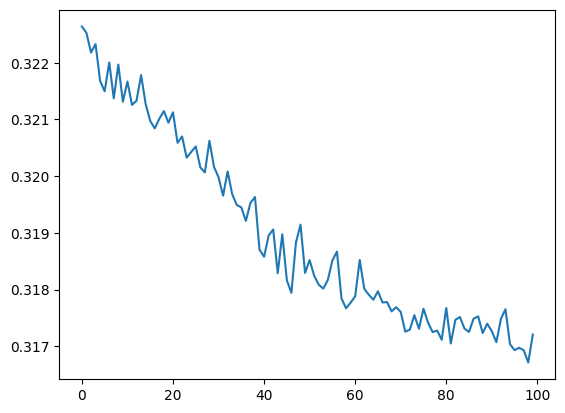

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])